<a href="https://colab.research.google.com/github/ahoucbvtw/Iris-DecisionTreeClassifier/blob/main/Iris-DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

data = pd.DataFrame(iris["data"], columns = iris["feature_names"])
data["answer"] = iris["target"]
data#這是類似print(data)的意思

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
answer,0.782561,-0.426658,0.949035,0.956547,1.000000


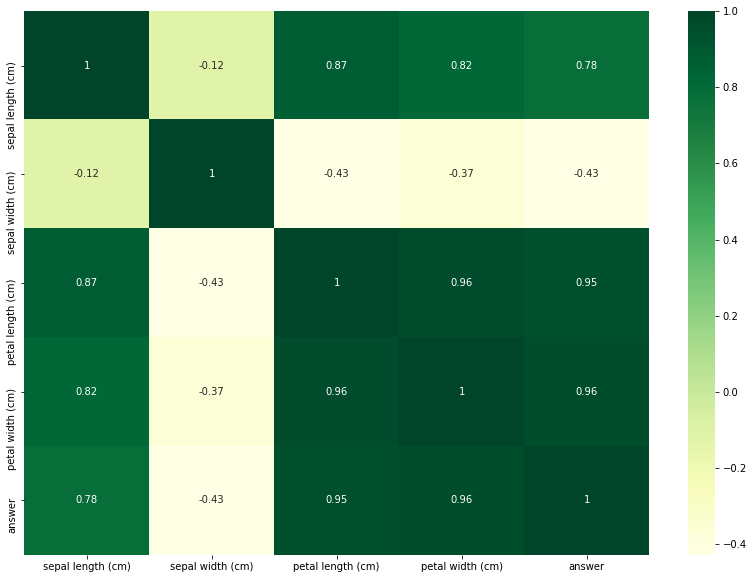

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#特殊語法,加了這個可以不用在每個圖片最後+plt.show,但是python的py檔本身有沒有支援,目前Jupyter和Colab有支援
%matplotlib inline 
plt.figure(figsize = (14,10))#更改畫圖的大小(寬*高)
sns.heatmap(data.astype("float").corr(), cmap = "YlGn", annot= True)#camp更改顏色,annot於熱度圖上標示數值
data.corr()#相關係數矩陣(pandas 內建涵式)

In [3]:
x = data.drop(["answer"], axis = 1)#去掉行axis = 1,去掉列axis = 0
y = data["answer"]

In [4]:
from sklearn.model_selection import train_test_split
#將資料隨機拆分成多少等份
#train_test_split([1, 2, 3, 4],[5, 6, 7, 8], test_size = 0.25)
#拆成9份訓練/1份驗證測試(random_state = 0 可以把每次切分都相同資料，但選擇還是隨機選)
#訓練和測試盡量9/1或8/2分，讓訓練資料要多一點
#[x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [5]:
from sklearn.tree import DecisionTreeClassifier
#準備演算法(設定max_depth = 2層來防止過度訓練導致驗證不准，依照各個資料來設定)
clf = DecisionTreeClassifier(max_depth = 2)
#把資料帶入獲得完整模型
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

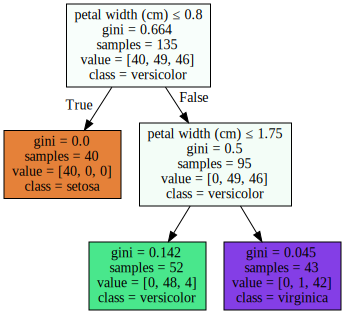

In [6]:
import graphviz
from sklearn.tree import export_graphviz
#製作一決策樹=>可以使信心程度提高說這是屬於哪個分類
#Gini係數 = 猜錯的機率，所以最後分類會將猜錯機率變小
#ΣPi(1-Pi) ≒ 0 => 猜錯機率
a = export_graphviz(clf, 
                feature_names = x.columns, 
                class_names = iris["target_names"], 
                filled = True,
                special_characters = True)
graphviz.Source(a)

In [7]:
#拿測試資料驗證預測
from sklearn.metrics import accuracy_score

pre = clf.predict(x_test)
print("真正結果", list(y_test))
print("預測結果", list(pre))
accuracy_score(y_test, pre)

真正結果 [0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1]
預測結果 [0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1]


0.9333333333333333

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)

pd.DataFrame(mat, columns=["{}(預測)".format(i) for i in range(3)],
       index=["{}(真正)".format(i) for i in range(3)])

,0(預測),1(預測),2(預測)
0(真正),10,0,0
1(真正),0,1,0
2(真正),0,1,3
